In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV
%matplotlib inline

In [106]:
from sklearn.datasets import make_classification

In [113]:
X,y = make_classification(n_samples=10000,
    n_features=20,n_informative=4,
    n_redundant=3,n_classes=3,n_clusters_per_class=3,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
y

array([0, 0, 2, ..., 2, 1, 0])

In [114]:
X_train

array([[ 1.83673019,  0.72936895, -0.82035216, ..., -2.52878627,
         0.25570096,  1.68361606],
       [-1.62867246,  1.95672031, -1.51713113, ...,  1.67200319,
         0.17492613,  0.1410726 ],
       [-1.29257925,  0.77035889, -0.33893455, ...,  1.0744304 ,
        -1.2622008 , -0.95960605],
       ...,
       [-1.58623742, -0.33331707,  1.44582666, ...,  1.01499354,
        -1.51850013, -0.29279776],
       [-0.19889264, -0.34766834,  2.2172518 , ...,  1.40637857,
         1.16767477,  0.87610733],
       [-0.68360516, -1.79612215, -0.98239122, ...,  2.64779194,
         2.61148872, -0.89594959]])

In [141]:
ingestion_pipeline = Pipeline([('std_scaler',StandardScaler()),
                              ('power_transformer',PowerTransformer())])
X_train_ingested = ingestion_pipeline.fit_transform(X_train,y_train)

In [142]:
model = LogisticRegression(multi_class='ovr')
model.fit(X_train_ingested,y_train)

LogisticRegression(multi_class='ovr')

In [144]:
X_test_ingested = ingestion_pipeline.transform(X_test)
model.score(X_test_ingested,y_test)

0.6621212121212121

In [145]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_ingested,y_train)


In [146]:
grid_result.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [152]:
model = LogisticRegression(multi_class='ovr',solver='liblinear')
model.fit(X_train_ingested,y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [153]:
ypred= model.predict(X_test_ingested)
model.score(X_test_ingested,y_test)

0.6621212121212121

In [162]:
from sklearn.metrics import confusion_matrix,recall_score,classification_report

In [154]:
cm = confusion_matrix(y_test,ypred)

In [135]:
y_test.shape

(3300,)

<AxesSubplot:>

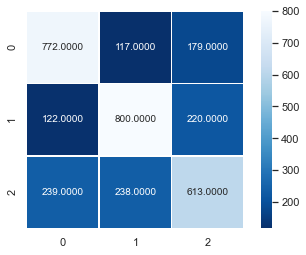

In [167]:
sns.heatmap(cm, annot=True,fmt=".4f", linewidths=.5, square = True, cmap = 'Blues_r')

In [161]:
recall_score(y_test,ypred,average='weighted')

0.6621212121212121

In [166]:
print(classification_report(y_test,ypred,digits=3))

              precision    recall  f1-score   support

           0      0.681     0.723     0.701      1068
           1      0.693     0.701     0.697      1142
           2      0.606     0.562     0.583      1090

    accuracy                          0.662      3300
   macro avg      0.660     0.662     0.660      3300
weighted avg      0.660     0.662     0.661      3300

